In [159]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [160]:
df = pd.read_csv(r"C:\Users\Mirka Gemelova\OneDrive - ITU\Dokumenty\ITU\DS_project\2025-FYP-groupG\important files to be deleted\metadata_adjusted.csv")

df.head()
df.isnull().sum()
df

y = df['diagnostic'].copy() #column with verdict: cancer or not cancer
#x = df.drop(col =['diagnostic', ], axis = 1)
best_features = ['elevation', 'bleed', 'smoke', 'grew', 'hurt', 'age', 'itch']
#best_features = ['elevation', 'bleed', 'changed', 'smoke', 'grew', 'hurt', 'skin_cancer_history','cancer_history', 'itch', 'pesticide']  #we can add more
#best_features = ['elevation', 'bleed', 'changed', 'smoke', 'grew', 'hurt', 'skin_cancer_history','cancer_history', 'itch', 'age'] #maybe BINARISE the age!
x = df[best_features].copy()
#Best performing features: elevation, bleed, changed, smoke, grew, hurt, fitspat

#Deviding into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=101) #stratify = y makes sure that both training and test sets preserve the original class proportions.
#and then test to test and validation

print(len(x_train),len(y_train))
x_train, x_validation,y_train, y_validation =train_test_split(x_train, y_train, test_size=0.2, stratify=y_train, random_state=101)

#This gives us:
#~64% training (x_train2)
#~16% validation (x_validation)
#~20% test (x_test)

1179 1179


In [161]:
x.head()

,elevation,bleed,smoke,grew,hurt,age,itch
0,1,1,0,1,0,55,1
1,1,1,0,1,0,79,1
2,1,1,0,1,0,52,0
3,1,1,0,1,1,74,1
4,0,0,0,1,0,58,0


In [162]:
print(f'x_train : {x_train.shape}')
print(f'y_train : {y_train.shape}')
print(f'x_validation : {x_validation.shape}')
print(f'y_validation : {y_validation.shape}')

x_train : (943, 7)
y_train : (943,)
x_validation : (236, 7)
y_validation : (236,)


In [163]:
#Building the model (not parameter tuned yet)
rf_model = RandomForestClassifier() #can change a LOT of parameters here n_
rf_model.fit(x_train, y_train)

RandomForestClassifier()

In [164]:
rf_model.score(x_validation, y_validation)

0.7627118644067796

In [165]:
#Building our predictions
y_pred = rf_model.predict(x_validation) #predict y (cancerous or not) based on the model

#checking accuracy on test
print("Accuracy:", accuracy_score(y_validation, y_pred))
print("Classification Report:\n", classification_report(y_validation, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_validation, y_pred))

Accuracy: 0.7627118644067796
Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.53      0.54        62
           1       0.84      0.84      0.84       174

    accuracy                           0.76       236
   macro avg       0.69      0.69      0.69       236
weighted avg       0.76      0.76      0.76       236

Confusion Matrix:
 [[ 33  29]
 [ 27 147]]


In [166]:
#See what features were most important for this model
features = pd.DataFrame(rf_model.feature_importances_, index=x.columns )

features.head(10)

,0
elevation,0.123850
bleed,0.095736
smoke,0.028683
grew,0.049745
hurt,0.040012
age,0.619580
itch,0.042395


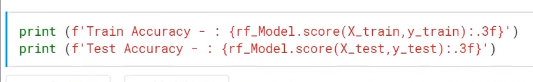

In [167]:
#RF with hyperparamaters

rf2 = RandomForestClassifier(n_estimators = 1000,
                             criterion = 'entropy',
                             min_samples_split = 10,
                             max_depth = 14,
                             random_state=101

)

In [168]:
rf2.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=14, min_samples_split=10,
                       n_estimators=1000, random_state=101)

In [169]:
rf2.score(x_validation, y_validation)

0.7754237288135594

In [170]:
y_pred2 = rf2.predict(x_validation)

In [171]:
print(classification_report(y_validation, y_pred2))

              precision    recall  f1-score   support

           0       0.60      0.44      0.50        62
           1       0.82      0.90      0.85       174

    accuracy                           0.78       236
   macro avg       0.71      0.67      0.68       236
weighted avg       0.76      0.78      0.76       236



In [172]:
#Parameter tuning - Using Gridsearch and Random

param_grid = [{
    'n_estimators':[100,200,500], #More trees = better performance up to a point, then diminishing returns.
    'max_depth': [5, 10, 20, 30], #higher the values the more we risk overfitting
    'criterion': ['entropy', 'gini'], #can also comment this out
    'min_samples_split': [5,10,15], # minimum number of samples a node must have to be split into two child nodes in a decision tree. Default is 2 (canm overfit)
    'min_samples_leaf': [1, 2, 4]#,
    #'max_features': ['sqrt', 'log2', None]

}]

random_param_grid = [{
    'n_estimators':[100,200,500], #More trees = better performance up to a point, then diminishing returns.
    'max_depth': [5, 10, 20, 30], #higher the values the more we risk overfitting
    'criterion': ['entropy', 'gini'],
    'min_samples_split': [5,10,15], # minimum number of samples a node must have to be split into two child nodes in a decision tree. Default is 2 (canm overfit)
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]

}]

There are three main methods:

- Grid Search (try every combo — slow but thorough)
- Randomized Search (faster, tries a random sample of hyperparameters)
- Bayesian/Automated Search (advanced, e.g., Optuna, Hyperopt)

In [173]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(rf_model,
                           param_grid,
                           cv = 2,
                           scoring = 'recall',
                           n_jobs=-1,                          
                           )

In [174]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid=[{'criterion': ['entropy', 'gini'],
                          'max_depth': [5, 10, 20, 30],
                          'min_samples_leaf': [1, 2, 4],
                          'min_samples_split': [5, 10, 15],
                          'n_estimators': [100, 200, 500]}],
             scoring='recall')

In [175]:
print(grid_search.best_score_)
print(grid_search.best_params_)

0.9469378849257319
{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 100}


In [176]:
from sklearn.model_selection import RandomizedSearchCV

random_grid_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=random_param_grid,
    n_iter=50,                 # n_iter is number of random combinations to try (instead of multiplying across)
    cv=5,                      # 5-fold cross-validation
    verbose=1,                 
    n_jobs=-1,
    scoring='recall',        
    random_state=101
)

In [177]:
random_grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=50,
                   n_jobs=-1,
                   param_distributions=[{'criterion': ['entropy', 'gini'],
                                         'max_depth': [5, 10, 20, 30],
                                         'max_features': ['sqrt', 'log2', None],
                                         'min_samples_leaf': [1, 2, 4],
                                         'min_samples_split': [5, 10, 15],
                                         'n_estimators': [100, 200, 500]}],
                   random_state=101, scoring='recall', verbose=1)

In [178]:
print(random_grid_search.best_score_)
print(random_grid_search.best_params_)

0.948376156217883
{'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 5, 'criterion': 'gini'}
